## Importing Libraries

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading File

In [168]:
df=pd.read_csv('EastWestAirlines1.csv')

In [169]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [170]:
df.shape

(3999, 12)

In [171]:
df.drop('ID#',inplace=True,axis=1)

In [172]:
df['Qual_miles'].value_counts()
#Since, max values of the feature are zero. We can drop it.
df.drop('Qual_miles',axis=1,inplace=True)

## NO NULL VALUES

In [173]:

df.isnull().any()

,0
Balance,False
cc1_miles,False
cc2_miles,False
cc3_miles,False
Bonus_miles,False
Bonus_trans,False
Flight_miles_12mo,False
Flight_trans_12,False
Days_since_enroll,False
Award?,False


## NO DUPLICATES

In [174]:
df.duplicated().any()

np.True_

In [175]:
df.drop_duplicates(inplace=True,ignore_index=True)

## CHECKING FOR INCORRECT VALUES AND IDENTIFYING NATURE OF COLUMNS

In [176]:
for i in df.columns:
    print(i,df[i].unique())

Balance [28143 19244 41354 ... 73597 54899  3016]
cc1_miles [1 4 3 2 5]
cc2_miles [1 2 3]
cc3_miles [1 3 2 4 5]
Bonus_miles [  174   215  4123 ...  8525   981 25447]
Bonus_trans [ 1  2  4 26  0 25 43 28 10 19 20  6 15 16  5 17 23 11 21  8 13 14 18 24
 38 45  7 12 22  3  9 39 41 27 40 31 30 34 32 35 37 29 47 53 55 51 33 50
 36 46 52 44 65 49 58 86 68]
Flight_miles_12mo [    0  2077   250  3850  1150  1800  3450   150   700  1227   100   500
  2500   550   350  3250  2000   300  6368   650   600  2200  5550    50
   631   556  1200   900  1250  1500  2950  2050  2300  2550  4833   818
  1000  2250  1050  5200   335  1850  7172   450  1600  1718  3604   200
   750   232  3928  1400  1329  2700  3050   273  6400  2100   950  4823
   850  1300  2309  2400  3226  1750   398  9166   258  6078  1650  1950
  2211  5300  6393  1450   359  4485  5500  7741   400  3000   759  2600
  6381  1700  3300  3400  4387 10250  6568   213   800  5780  3350 10650
  1373  3802  7939   316   720  3600  7266  2

## DISCRETE VALUE COLUMNS AND CONTINUOUS VALUE COLUMNS

In [177]:
discrete_columns=['Award?','cc1_miles','cc2_miles','cc3_miles']
cont_columns=list(set(df.columns)-set(discrete_columns))
cont_columns

['Flight_trans_12',
 'Bonus_miles',
 'Balance',
 'Days_since_enroll',
 'Bonus_trans',
 'Flight_miles_12mo']

## BOXPLOT AND OUTLIER REMOVAL

<Axes: >

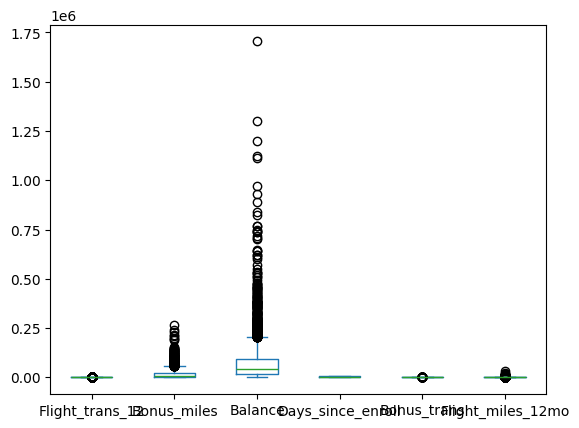

In [178]:
df[cont_columns].plot(kind='box')

In [179]:
# for i in ['Balance','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12']:
for i in df.columns:
    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.50)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower_extreme=q1-1.5*iqr
    upper_extreme=q3+1.5*iqr
    median=df[i].median()
    is_upper_outlier=(df[i] > upper_extreme)
    is_lower_outlier=(df[i] < lower_extreme)
    df.loc[is_lower_outlier,i]=lower_extreme
    df.loc[is_upper_outlier,i]=upper_extreme

In [180]:
df.shape

(3998, 10)

In [181]:
df

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,1,1,1,174.0,1,0.00,0.0,7000,0.0
1,19244.0,1,1,1,215.0,2,0.00,0.0,6968,0.0
2,41354.0,1,1,1,4123.0,4,0.00,0.0,7034,0.0
3,14776.0,1,1,1,500.0,1,0.00,0.0,6952,0.0
4,97752.0,4,1,1,43300.0,26,783.75,2.5,6935,1.0
...,...,...,...,...,...,...,...,...,...,...
3993,18476.0,1,1,1,8525.0,4,200.00,1.0,1403,1.0
3994,64385.0,1,1,1,981.0,5,0.00,0.0,1395,1.0
3995,73597.0,3,1,1,25447.0,8,0.00,0.0,1402,1.0
3996,54899.0,1,1,1,500.0,1,500.00,1.0,1401,0.0


## Stats Summary

In [182]:
df.describe(include='all')

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3998.000000,3998.00000,3998.0,3998.0,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,63783.828477,2.05978,1.0,1.0,15416.377470,11.473487,178.989682,0.591671,4119.190095,0.370435
std,58671.432462,1.37699,0.0,0.0,18079.537488,9.114438,296.513589,0.944898,2065.007629,0.482982
min,0.000000,1.00000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,18534.250000,1.00000,1.0,1.0,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,43138.000000,1.00000,1.0,1.0,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,92405.000000,3.00000,1.0,1.0,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,203211.125000,5.00000,1.0,1.0,57651.875000,38.000000,783.750000,2.500000,8296.000000,1.000000


## BAR CHART

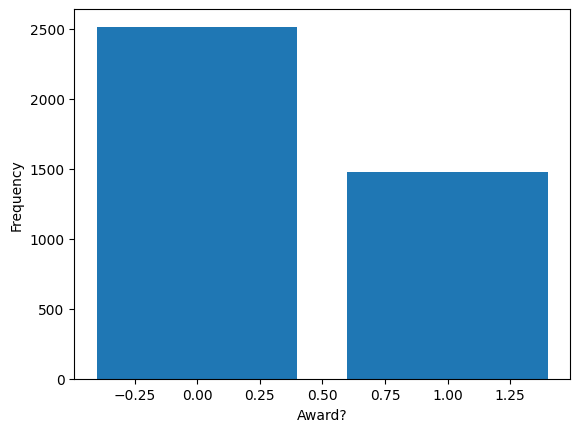

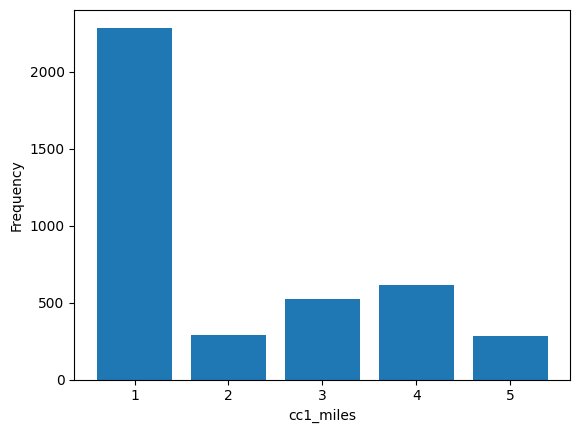

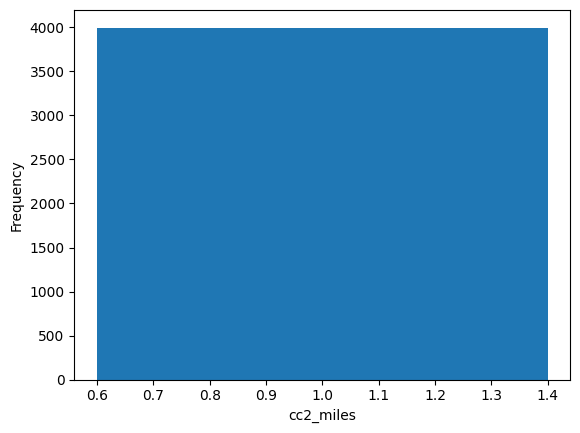

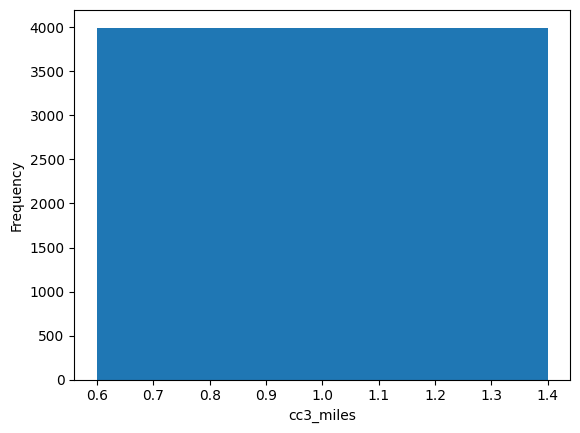

In [183]:

for i in discrete_columns:
    plt.bar(x=df[i].unique(),height=df[i].value_counts())
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

## HISTOGRAM

<Figure size 1000x1800 with 0 Axes>

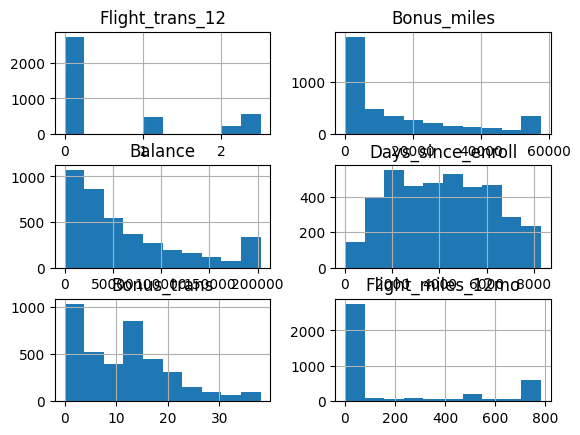

In [184]:
plt.figure(figsize=(10,18))
df[cont_columns].hist();

## Scaling

In [185]:
from sklearn.preprocessing import StandardScaler
std_sca=StandardScaler()
columns=df.columns
df[columns]=std_sca.fit_transform(df[columns])

## HISTOGRAM

<Figure size 1000x1800 with 0 Axes>

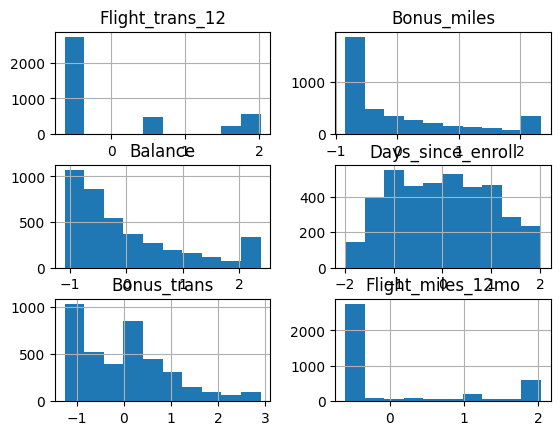

In [186]:
plt.figure(figsize=(10,18))
df[cont_columns].hist();

In [187]:
df

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.607541,-0.769732,0.0,0.0,-0.843179,-1.149253,-0.603723,-0.626252,1.395235,-0.767072
1,-0.759235,-0.769732,0.0,0.0,-0.840911,-1.039523,-0.603723,-0.626252,1.379736,-0.767072
2,-0.382343,-0.769732,0.0,0.0,-0.624728,-0.820064,-0.603723,-0.626252,1.411702,-0.767072
3,-0.835397,-0.769732,0.0,0.0,-0.825145,-1.149253,-0.603723,-0.626252,1.371987,-0.767072
4,0.579028,1.409207,0.0,0.0,1.542468,1.593991,2.039825,2.019866,1.363754,1.303659
...,...,...,...,...,...,...,...,...,...,...
3993,-0.772326,-0.769732,0.0,0.0,-0.381218,-0.820064,0.070867,0.432195,-1.315506,1.303659
3994,0.010248,-0.769732,0.0,0.0,-0.798537,-0.710334,-0.603723,-0.626252,-1.319381,1.303659
3995,0.167277,0.682894,0.0,0.0,0.554875,-0.381145,-0.603723,-0.626252,-1.315990,1.303659
3996,-0.151453,-0.769732,0.0,0.0,-0.825145,-1.149253,1.082751,0.432195,-1.316475,-0.767072


## CORRELATION MAP

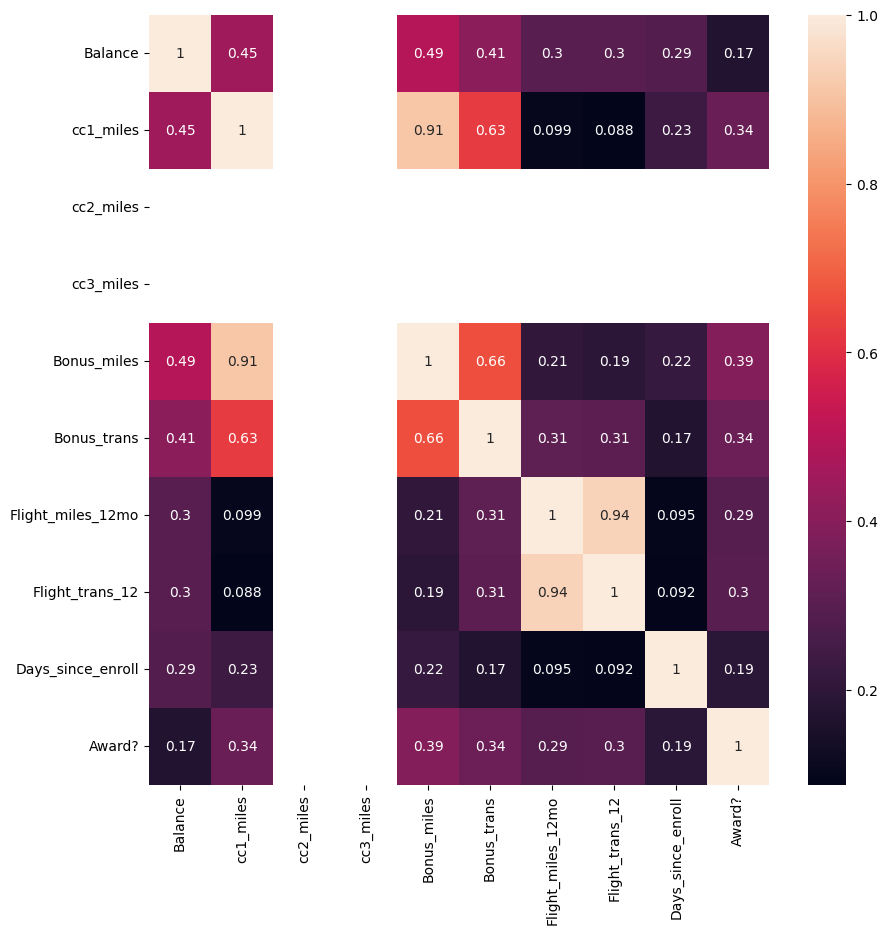

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## K-MEANS

## Applying Principal Component Analysis to reduce dimensionlaity and visualise clusters

In [189]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df)
transformed_data=pca.transform(df)

In [190]:
transformed_data=pd.DataFrame(transformed_data,columns=['PC1','PC2'])
transformed_data

,PC1,PC2
0,-1.738531,-0.190024
1,-1.748161,-0.195530
2,-1.418936,-0.310944
3,-1.815373,-0.182092
4,4.071673,1.148652
...,...,...
3993,-0.823118,1.056923
3994,-1.224594,0.086247
3995,0.192789,-0.936197
3996,-1.250307,1.695567


## Kmeans-Random initialisation of centroids

In [191]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (ndarray): Data points
        K (int):     number of centroids/clusters

    Returns:
        centroids (ndarray): Initialized centroids
    """

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

## Computes the centroids closest to a given point

In [192]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """

    # Set K
    K = centroids.shape[0]

    # return idx
    idx = np.zeros(X.shape[0], dtype=int)


    m = X.shape[0]
    for i in range(m):
        distances = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distances.append(norm_ij)
        idx[i] = np.argmin(distances)


    return idx

## Centroid computation

In [193]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly
    centroids = np.zeros((K, n))


    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis = 0)


    return centroids

## Running Kmeans function

In [194]:
def run_kMeans(X, initial_centroids, max_iters):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    inertia = 0
    for i in range(m):
        centroid = centroids[int(idx[i])]
        inertia += np.sum((X[i] - centroid) ** 2)
    return centroids, idx,inertia

In [195]:
# Load an example dataset
X=transformed_data.values

## ELBOW METHOD

In [196]:
inertia_arr=[]
for i in range(1,11):
    K = i
    max_iters = 10
    initial_centroids = kMeans_init_centroids(X, K)
    _,_,inertia=run_kMeans(X,initial_centroids,max_iters)
    inertia_arr.append(inertia)
print(inertia_arr)
#lower the inertia better the cluster distribution. Inertia is sum of squares of distances of data points from centre of cluster.

[np.float64(20691.59925576447), np.float64(10976.282181613653), np.float64(6386.133548233005), np.float64(4010.2355390452294), np.float64(2896.423018178837), np.float64(2558.8000160670467), np.float64(2316.8324041468336), np.float64(2133.6950790332103), np.float64(1812.0004741597256), np.float64(1719.281478662517)]


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

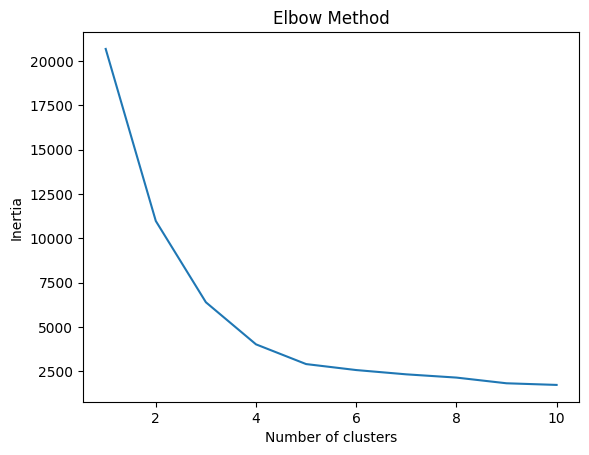

In [197]:
plt.plot(range(1,11),inertia_arr)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow Method");

## Optimal K=4

<Figure size 800x600 with 0 Axes>

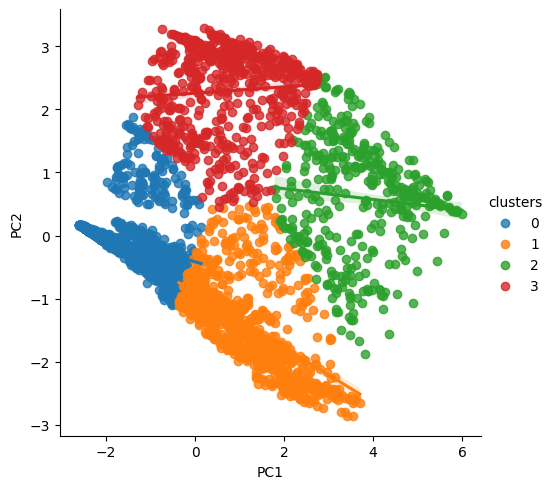

In [198]:
## Chosing the optimal k
optimal_k=4
initial_centroids = kMeans_init_centroids(X, optimal_k)
centroids,idx,inertia=run_kMeans(X,initial_centroids,50)
transformed_data['clusters']=idx
sns.lmplot(data=transformed_data,x='PC1',y='PC2',hue='clusters')

## Silhoutte Score Calculation Function

In [199]:
def silhouette_score(X, labels):
    """
    Compute the silhouette score for clustering.

    Args:
        X (ndarray): Dataset, shape (m, n)
        labels (ndarray): Cluster assignment for each sample, shape (m,)

    Returns:
        float: Silhouette score (-1 to 1)
    """
    m = X.shape[0]
    unique_clusters = np.unique(labels)
    K = len(unique_clusters)

    if K == 1:
        raise ValueError("Silhouette score is not defined for only one cluster.")

    scores = []

    for i in range(m):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == k] for k in unique_clusters if k != labels[i]]

        # a(i): mean intra-cluster distance
        if len(same_cluster) > 1:
            a = np.mean(np.linalg.norm(same_cluster - X[i], axis=1))
        else:
            a = 0  # single point in cluster

        # b(i): min mean inter-cluster distance
        b = np.min([np.mean(np.linalg.norm(cluster - X[i], axis=1)) for cluster in other_clusters])

        # silhouette score for point i
        s = (b - a) / max(a, b)
        scores.append(s)

    return np.mean(scores)

In [200]:
score = silhouette_score(X, idx)
print("Silhouette Score:", score)

Silhouette Score: 0.5494104567253556


In [201]:
pc_df = pd.DataFrame(pca.components_, columns=df.columns, index=['PC1', 'PC2'])
print(pc_df)

      Balance  cc1_miles     cc2_miles     cc3_miles  Bonus_miles  \
PC1  0.353220   0.419943 -0.000000e+00 -0.000000e+00     0.453228   
PC2 -0.049302  -0.384421  5.551115e-17 -1.110223e-16    -0.306369   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
PC1     0.418702           0.309914         0.306940           0.194930   
PC2    -0.125506           0.600548         0.606003          -0.095649   

       Award?  
PC1  0.299832  
PC2  0.055944  


## Overall Analysis
The customer can be segmented in 4 sections -(Low PC2,Low PC1),(High PC1,Low PC2),(High PC2,Low PC1),(High PC2,High PC1)
The features which contribute maximum to PC1 and PC2 can be seen below

In [202]:
for i, pc in enumerate(pca.components_):
    top_features = [df.columns[j] for j in np.argsort(np.abs(pc))[-3:][::-1]]
    print(f"Top 3 features for PC{i+1}: {top_features}")


Top 3 features for PC1: ['Bonus_miles', 'cc1_miles', 'Bonus_trans']
Top 3 features for PC2: ['Flight_trans_12', 'Flight_miles_12mo', 'cc1_miles']
